<a href="https://colab.research.google.com/github/fawziafaraag/machine-learning-II/blob/main/Hierarchical_Clustering_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-     columns names     <br>
2-     different datatype <br>
3-     missing data(Null values)   <br>

In [7]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [8]:
#solution 
#There are problems with our column names.
df_copy.columns = (["country","region","population","area","density",
                    "coastline","migration","infant_mortality","gdp","literacy",
                    "phones","arable","crops","other","climate",
                    "birthrate","deathrate","agriculture","industry","service"])


In [9]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           227 non-null    object 
 1   region            227 non-null    object 
 2   population        227 non-null    int64  
 3   area              227 non-null    int64  
 4   density           227 non-null    object 
 5   coastline         227 non-null    object 
 6   migration         224 non-null    object 
 7   infant_mortality  224 non-null    object 
 8   gdp               226 non-null    float64
 9   literacy          209 non-null    object 
 10  phones            223 non-null    object 
 11  arable            225 non-null    object 
 12  crops             225 non-null    object 
 13  other             225 non-null    object 
 14  climate           205 non-null    object 
 15  birthrate         224 non-null    object 
 16  deathrate         223 non-null    object 
 1

**Second issue**

In [10]:
#solution 
##We have to change our datatype to "category" and "float" to use easily
df_copy.country = df_copy.country.astype('category')
df_copy.region = df_copy.region.astype('category')
df_copy.density =df_copy.density.str.replace(",",".").astype(float)
df_copy.coastline = df_copy.coastline.str.replace(",",".").astype(float)
df_copy.migration = df_copy.migration.str.replace(",",".").astype(float)
df_copy.infant_mortality = df_copy.infant_mortality.str.replace(",",".").astype(float)
df_copy.literacy = df_copy.literacy.str.replace(",",".").astype(float)
df_copy.phones = df_copy.phones.str.replace(",",".").astype(float)
df_copy.arable = df_copy.arable.str.replace(",",".").astype(float)
df_copy.crops = df_copy.crops.str.replace(",",".").astype(float)
df_copy.other = df_copy.other.str.replace(",",".").astype(float)
df_copy.climate =df_copy.climate.str.replace(",",".").astype(float)
df_copy.birthrate = df_copy.birthrate.str.replace(",",".").astype(float)
df_copy.deathrate = df_copy.deathrate.str.replace(",",".").astype(float)
df_copy.agriculture = df_copy.agriculture.str.replace(",",".").astype(float)
df_copy.industry = df_copy.industry.str.replace(",",".").astype(float)
df_copy.service = df_copy.service.str.replace(",",".").astype(float)

In [11]:
#test 
df_copy.info()
df_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           227 non-null    category
 1   region            227 non-null    category
 2   population        227 non-null    int64   
 3   area              227 non-null    int64   
 4   density           227 non-null    float64 
 5   coastline         227 non-null    float64 
 6   migration         224 non-null    float64 
 7   infant_mortality  224 non-null    float64 
 8   gdp               226 non-null    float64 
 9   literacy          209 non-null    float64 
 10  phones            223 non-null    float64 
 11  arable            225 non-null    float64 
 12  crops             225 non-null    float64 
 13  other             225 non-null    float64 
 14  climate           205 non-null    float64 
 15  birthrate         224 non-null    float64 
 16  deathrate         223 non-

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Third issue

In [12]:
missing = df_copy.isnull().sum()
missing

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

In [13]:
#solution 
#There are some Nan values and these will be a problem for us. So we have fix them
df_copy.fillna(df_copy.mean(),inplace=True)

In [14]:
#test
missing = df_copy.isnull().sum()
missing

country             0
region              0
population          0
area                0
density             0
coastline           0
migration           0
infant_mortality    0
gdp                 0
literacy            0
phones              0
arable              0
crops               0
other               0
climate             0
birthrate           0
deathrate           0
agriculture         0
industry            0
service             0
dtype: int64

In [22]:
df_copy.drop(df_copy.columns[[0,1]], axis=1, inplace=True)
df_copy

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [24]:
transformed_data = scaler.fit_transform(df_copy)

In [25]:
transformed_data=pd.DataFrame(transformed_data,columns=df_copy.columns)
transformed_data

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,0.019695,0.027583,-0.199844,-0.293443,4.750696e+00,3.636688,-8.985536e-01,-2.481004e+00,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075e+00,1.619132,-0.321149,-1.158818e+00
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201e+00,-0.398754,-5.187348e-01,1.939599e-01,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-8.149012e-01,0.573417,-0.712145,8.579033e-02
2,0.035618,0.998421,-0.220490,-0.292889,-8.834605e-02,-0.128489,-3.688063e-01,-6.800381e-01,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-9.385141e-01,-0.352182,2.385742,-1.671672e+00
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495e+00,-0.747988,-1.689017e-01,7.501404e-01,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057e+00,0.000000,0.000000,-6.943685e-16
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081e+00,-0.896805,9.305737e-01,9.090492e-01,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-6.061780e-01,0.000000,0.000000,-6.943685e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,6.070728e-01,-0.452921,-8.885583e-01,7.527430e-16,-0.402992,0.239532,1.734375,-1.091961,1.298569,0.862560,-1.078338e+00,-0.429904,-0.020384,4.047604e-01
223,-0.242004,-0.185982,-0.228217,-0.287620,-7.159403e-18,0.000000,1.818122e-16,7.527430e-16,0.000000,-1.063546,-0.549507,1.143937,-1.717937,0.000000,-3.599679e-16,0.000000,0.000000,-1.033732e+00
224,-0.061923,-0.039330,-0.204312,-0.288452,-7.867312e-03,0.741034,-8.885583e-01,-1.728836e+00,-0.881998,-0.850483,-0.520612,0.956833,-1.717937,1.875396,-1.907579e-01,-0.111950,1.423292,-1.077512e+00
225,-0.146545,0.086427,-0.219584,-0.293443,-7.867312e-03,1.504789,-8.885583e-01,-1.185606e-01,-1.010620,-0.518538,-0.545895,0.702371,-0.209684,1.704784,2.165991e+00,0.488629,0.054808,-4.770981e-01


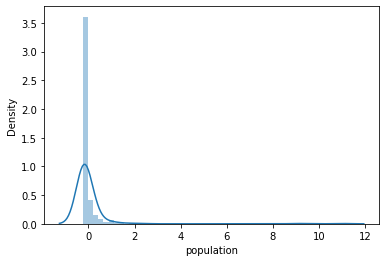

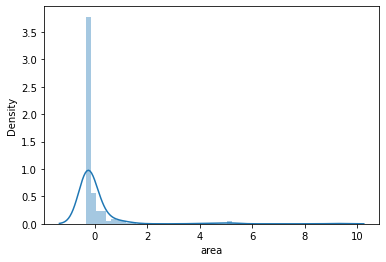

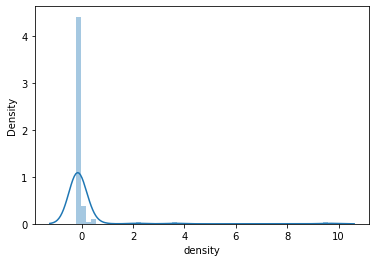

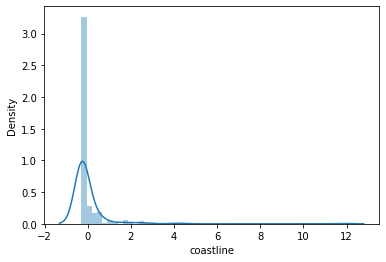

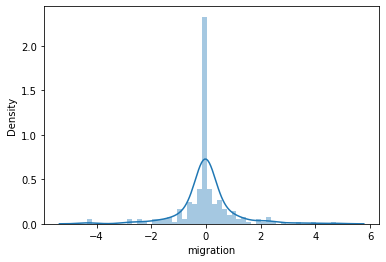

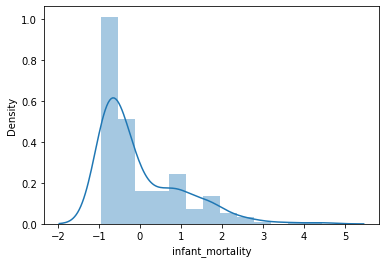

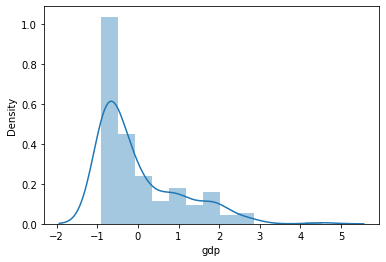

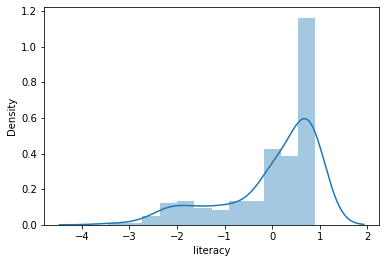

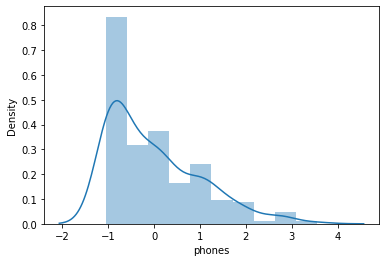

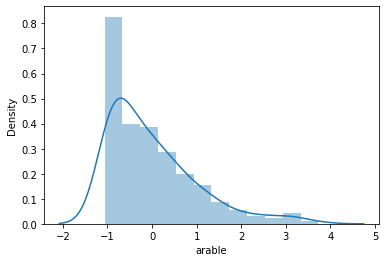

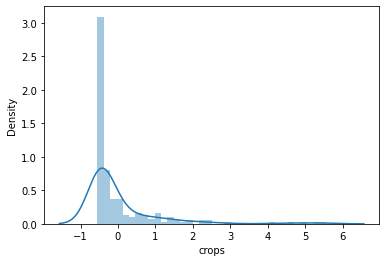

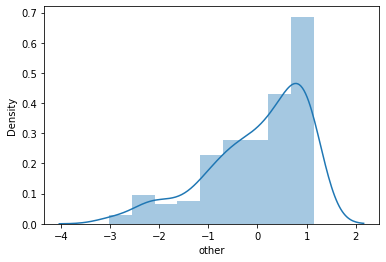

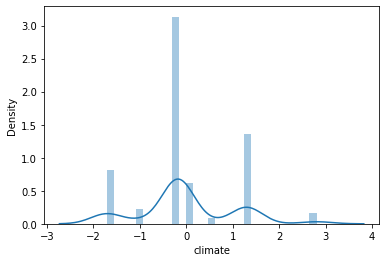

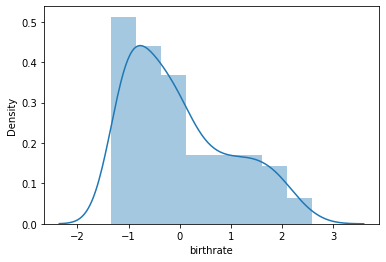

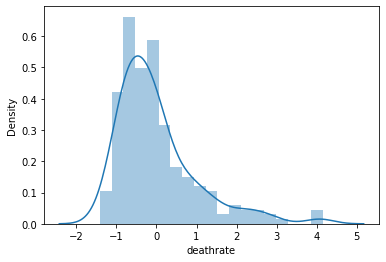

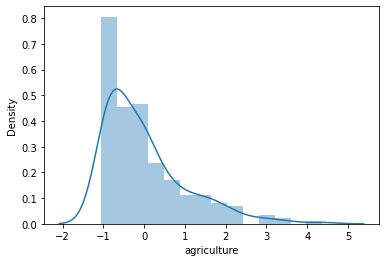

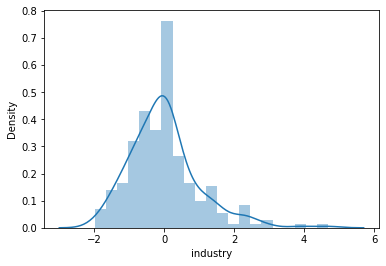

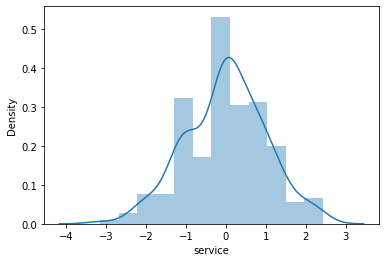

In [26]:
import seaborn as sns
for i in transformed_data.columns:
    sns.distplot(transformed_data[i])
    plt.show()

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

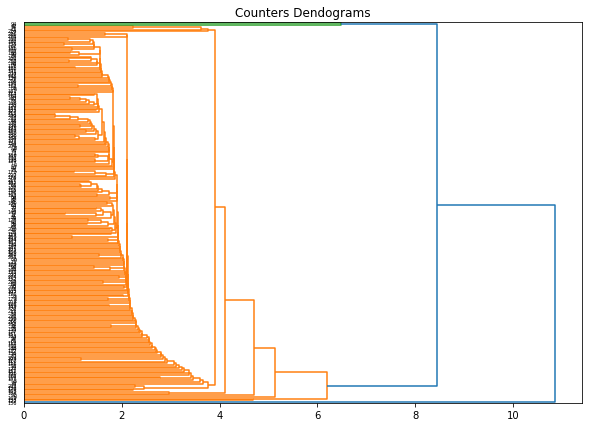

In [27]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data , method='single',metric='euclidean'),orientation='right')

plt.show()

#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function                                                                                    #and method with linkage criteria
                                                                                      #and metric with distance function

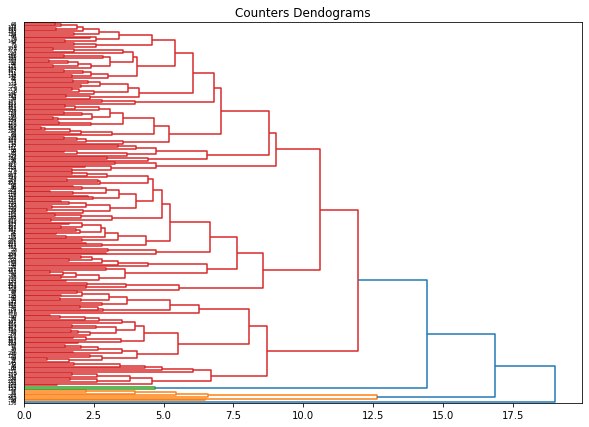

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data , method='complete',metric='euclidean'),orientation='right')

plt.show()

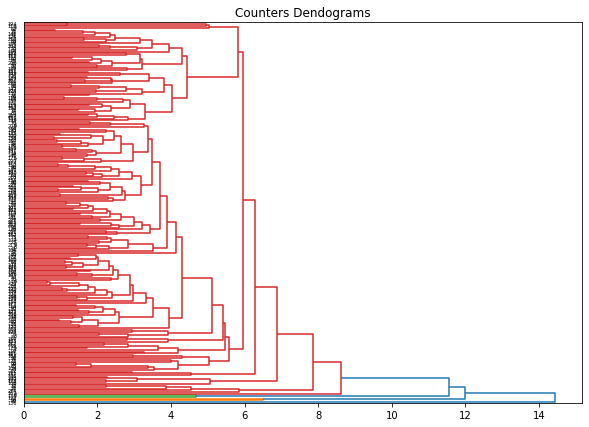

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data , method='average',metric='euclidean'),orientation='right')

plt.show()

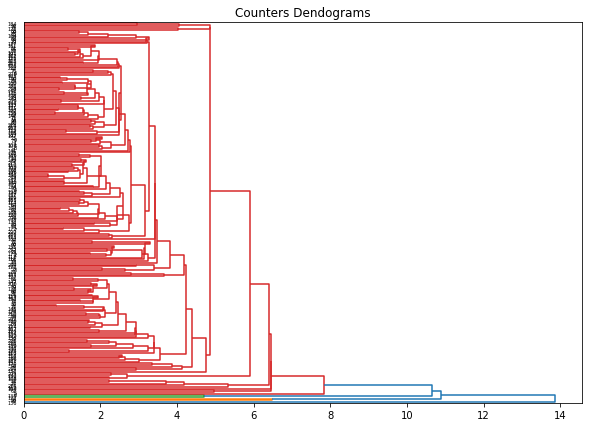

In [30]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data , method='centroid',metric='euclidean'),orientation='right')

plt.show()

In [31]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clu=AgglomerativeClustering(affinity='euclidean',n_clusters=4,linkage='single').fit(transformed_data)
clu.labels_




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [32]:
silhouette_score(transformed_data, labels=clu.labels_, metric='euclidean', sample_size=None, random_state=None)

0.5066102601211425

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clu=AgglomerativeClustering(affinity='euclidean',n_clusters=4,linkage='complete').fit(transformed_data)
clu.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [34]:
silhouette_score(transformed_data, labels=clu.labels_, metric='euclidean', sample_size=None, random_state=None)

0.42219980706313287

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clu=AgglomerativeClustering(affinity='euclidean',n_clusters=4,linkage='average').fit(transformed_data)
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [36]:
silhouette_score(transformed_data, labels=clu.labels_, metric='euclidean', sample_size=None, random_state=None)

0.5315233936412725

In [37]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clu=AgglomerativeClustering(affinity='euclidean',n_clusters=3,linkage='ward').fit(transformed_data)
clu.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1])

In [38]:
silhouette_score(transformed_data, labels=clu.labels_, metric='euclidean', sample_size=None, random_state=None)

0.16269887673394806

In [94]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [95]:
silhouette

[0.38807875221756544,
 0.27162837254211025,
 0.25021885520785553,
 0.21702473502401762,
 0.20125265586117588,
 0.13012849831170162,
 0.11766014318825053,
 0.09844048940223307,
 0.043159291547104864]

In [88]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [89]:
silhouette

[0.13382059674101338,
 0.1484870109983905,
 0.14624936965939353,
 0.14488871384151908,
 0.15235114561770055,
 0.13487645770561393,
 0.13405125419180333,
 0.12235559278219997,
 0.1251679686773861]

In [90]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [91]:
silhouette

[0.33172568299894345,
 0.26433977099433925,
 0.24218427024618422,
 0.26302074090118793,
 0.25078348040691434,
 0.21309269996352243,
 0.18402047098743818,
 0.17546892765832128,
 0.09939516344974046]

In [92]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [93]:
silhouette

[0.240258128185492,
 0.18211678790216873,
 0.17321940550503712,
 0.1634606304729342,
 0.16614296293374675,
 0.146356178612194,
 0.13513632178008908,
 0.1377586379167695,
 0.14675613544468344]

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

(array([[  0.,   7.,  34.,  50.,  59.,  31.,  31.,  10.,   5.,   0.],
        [  0.,   0.,   9.,  76.,  83.,  40.,  13.,   5.,   1.,   0.],
        [  1.,   2.,   3.,  47., 125.,  43.,   3.,   1.,   1.,   1.],
        [  0.,   0.,   5.,  62., 100.,  53.,   6.,   1.,   0.,   0.],
        [  0.,   0.,   1.,  39., 157.,  20.,   6.,   2.,   1.,   1.],
        [  0.,   0.,   0.,  45., 150.,  26.,   4.,   1.,   0.,   1.],
        [  0.,   0.,   3.,  35., 150.,  36.,   2.,   1.,   0.,   0.],
        [  0.,   0.,   3.,  25., 178.,  19.,   1.,   1.,   0.,   0.],
        [  0.,   0.,   1.,  34., 162.,  28.,   2.,   0.,   0.,   0.],
        [  0.,   0.,   2.,  19., 190.,  14.,   1.,   1.,   0.,   0.]]),
 array([-6.80821448, -5.29257865, -3.77694283, -2.261307  , -0.74567117,
         0.76996466,  2.28560049,  3.80123632,  5.31687215,  6.83250798,
         8.3481438 ]),
 <a list of 10 BarContainer objects>)

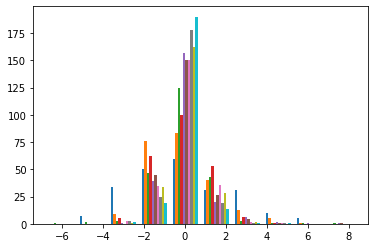

In [47]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 10)
  
data = pca.fit_transform(transformed_data)

  
explained_variance = pca.explained_variance_ratio_

plt.hist(data)

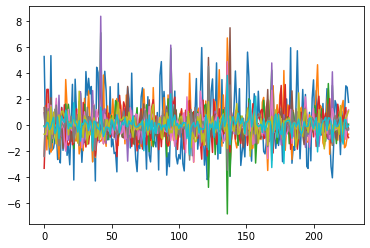

In [48]:
plt.plot(data)

In [49]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [50]:
silhouette

[0.6376260362091976,
 0.552534515844574,
 0.5418574312093392,
 0.3832834132616581,
 0.28596693533651824,
 0.22467545860802962,
 0.22139941343050487,
 0.16164045059449714,
 0.21026567145890204]

In [51]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)
silhouette

[0.6376260362091976,
 0.552534515844574,
 0.5043955623386196,
 0.5036849677995852,
 0.4577139947979292,
 0.36047701997248166,
 0.35388446650195887,
 0.1791433065020953,
 0.1887727527804936]

In [52]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)
silhouette

[0.6376260362091976,
 0.41623766356336817,
 0.4251695478053253,
 0.3446508708806007,
 0.24438350469546077,
 0.1714364169050297,
 0.16848158053058804,
 0.14296927289795505,
 0.12906835281147488]

In [53]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)
silhouette

[0.23535092313476574,
 0.18092974968847886,
 0.1823954110298325,
 0.17014093980391104,
 0.17611800768873315,
 0.18066234395675376,
 0.18875104559987632,
 0.19018979438512454,
 0.16835357242437157]